In [1]:
from pysead.Frame_2D import Frame_2D
from pysead.Frame_2D import Member_2D

In [2]:
M1 = Member_2D(member_number = 1,
               nodes = {1:[0,3], 2:[2,0]},
               area = 4e-2,
               inertia = 1e-6,
               elasticity = 200_000_000)
M2 = Member_2D(member_number = 2,
               nodes = {2:[2,0], 3:[6,0]},
               area = 4e-2,
               inertia = 1e-6,
               elasticity = 200_000_000)
M2.Add_Load_Full_Uniform(8)

Frame = Frame_2D()
Frame.Compile_Frame_Member_Properties([M1,M2])
Frame.supports = {1:[1,1,1], 3:[1,1,1]}
Frame.Solve()

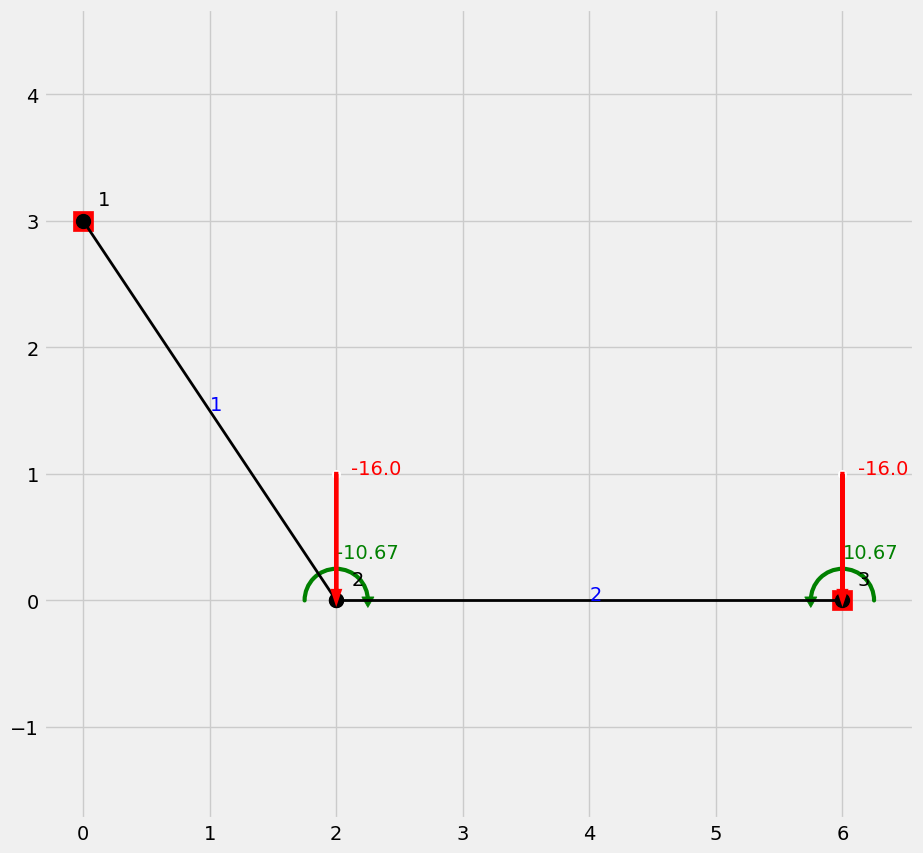

In [3]:
Frame.Draw_Frame_Setup(figure_size=[10,10], arrow_line_width=3,radius_of_arc=0.5)

In [4]:
Frame.reactions_

{1: [-12.206326461611573, 14.103174346852116, -2.803813452818243],
 3: [12.206326461611571, 17.896825653147886, -13.196119850903784]}

In [5]:
Frame.displacements_

{1: [0.0, 0.0, 0.0],
 2: [-6.103163230805786e-06, -1.4092534930867936e-05, -0.02528396244117304],
 3: [0.0, 0.0, 0.0]}

In [6]:
Frame.local_member_forces

{1: array([0, 0, 0, 0, 0, 0]),
 2: array([  0.        ,  16.        ,  10.66666667,   0.        ,
         16.        , -10.66666667])}

In [7]:
Frame.solved_member_forces

{1: array([ 33.52857308,  -2.33376398,  -2.80475096, -33.52857308,
          2.33376398,  -5.60975474]),
 2: array([-12.20632646,  -1.89682565,  -5.05784943,  12.20632646,
          1.89682565,  -2.52945318])}

In [8]:
Frame.local_member_forces_solved_

{1: array([ 33.52857308,  -2.33376398,  -2.80475096, -33.52857308,
          2.33376398,  -5.60975474]),
 2: array([-12.20632646,  14.10317435,   5.60881724,  12.20632646,
         17.89682565, -13.19611985])}

In [9]:
Frame.displacements_

{1: [0.0, 0.0, 0.0],
 2: [-6.103163230805786e-06, -1.4092534930867936e-05, -0.02528396244117304],
 3: [0.0, 0.0, 0.0]}

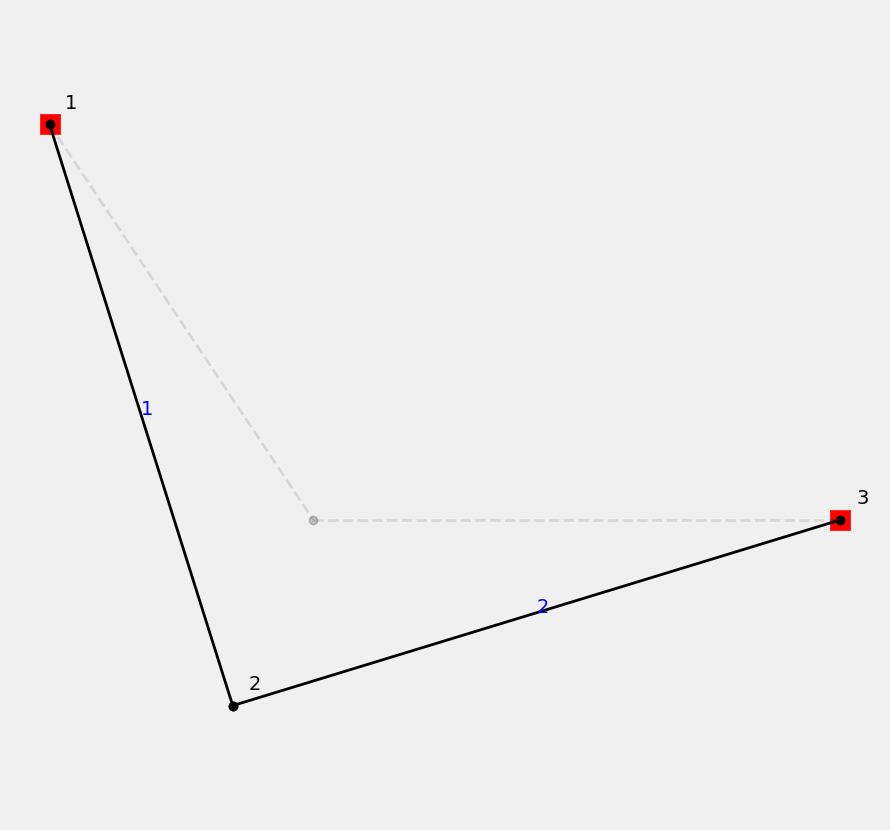

In [10]:
Frame.Draw_Frame_Displacements_(figure_size=[10,10], magnification_factor=100000)

In [11]:
Frame.reactions_

{1: [-12.206326461611573, 14.103174346852116, -2.803813452818243],
 3: [12.206326461611571, 17.896825653147886, -13.196119850903784]}

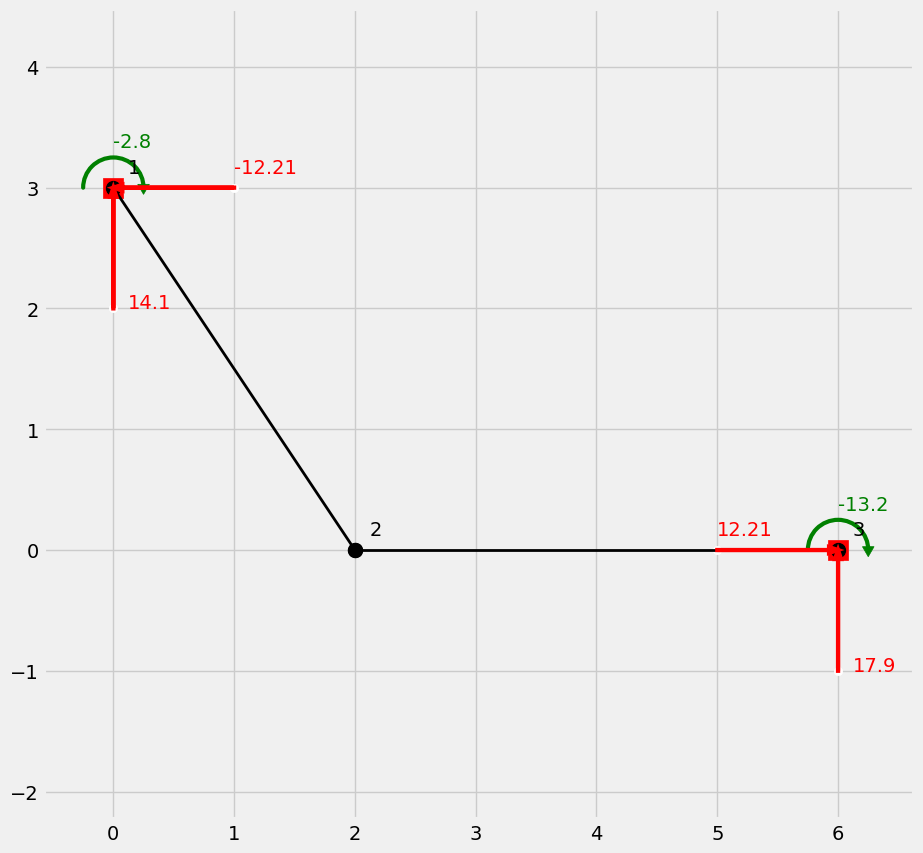

In [12]:
Frame.Draw_Reactions_(figure_size=[10,10], arrow_line_width=3,radius_of_arc=0.5, show_ext_forces=False)

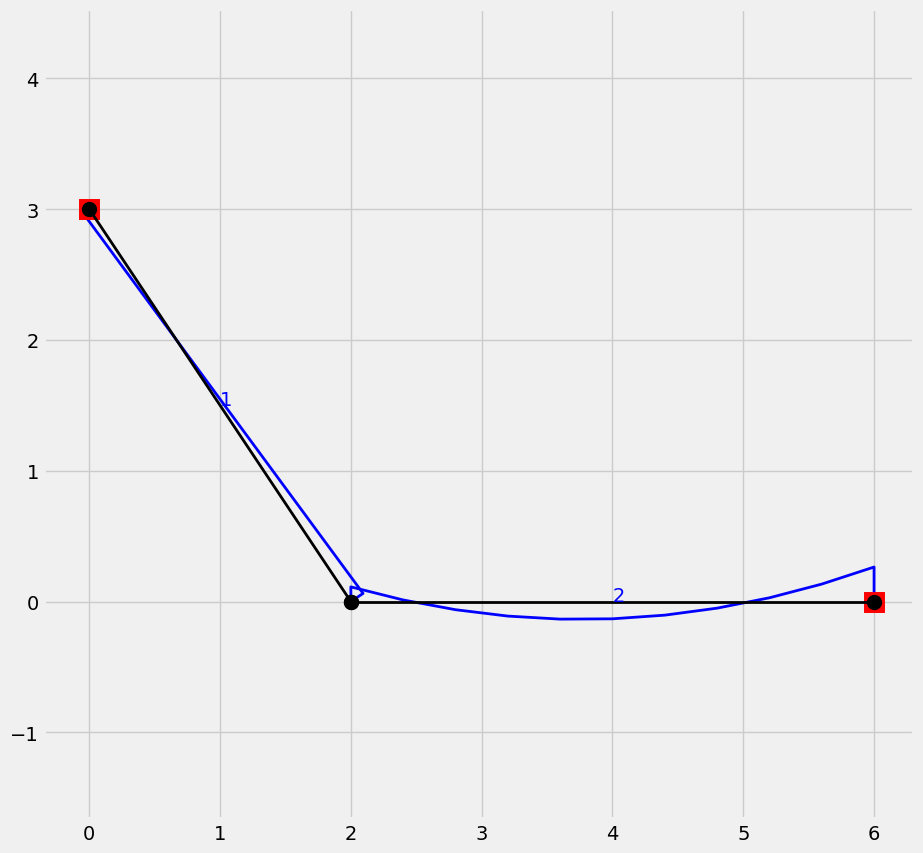

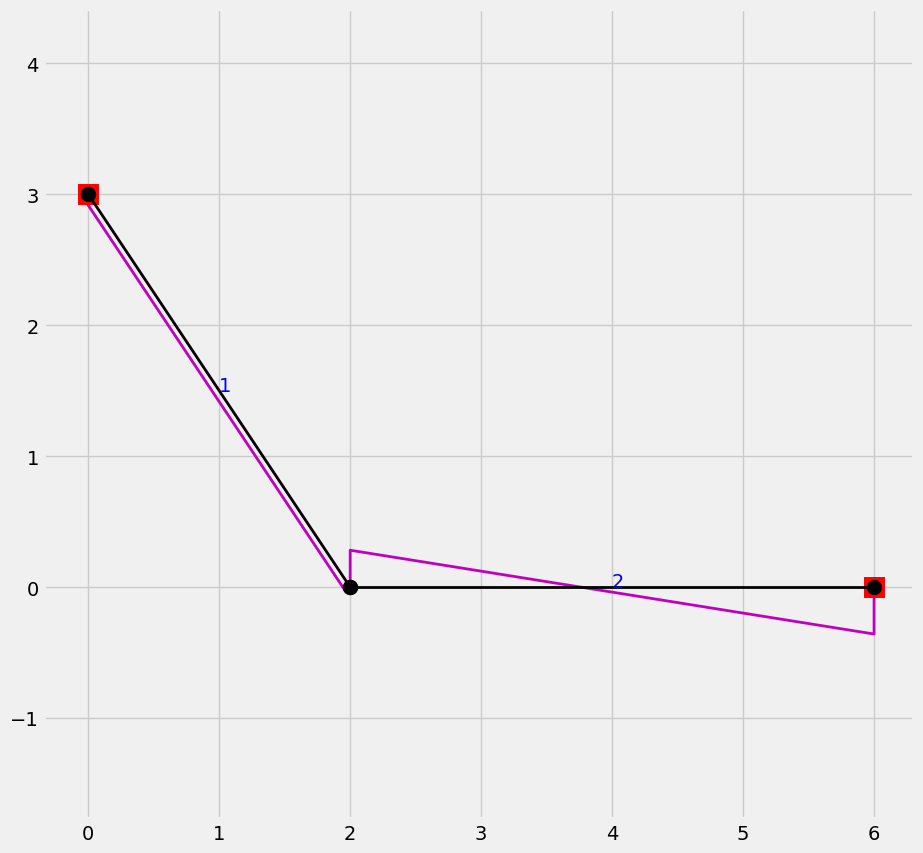

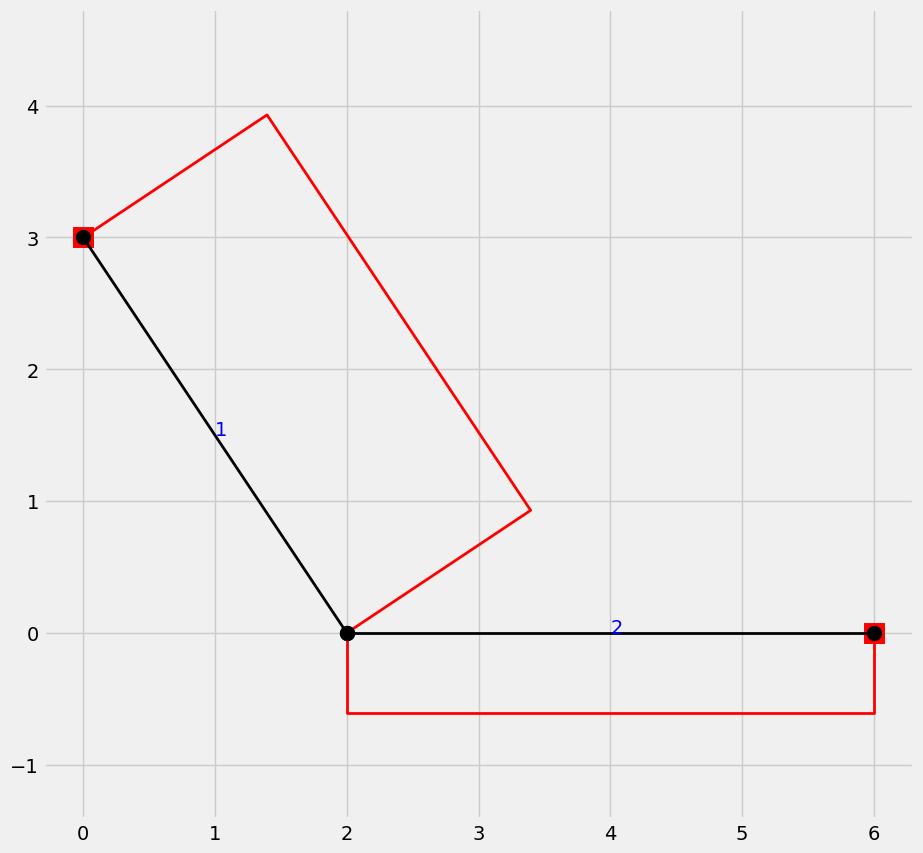

In [13]:
Frame.Draw_Moment_Diagram(figure_size = [10,10])
Frame.Draw_Shear_Diagram(figure_size = [10,10])
Frame.Draw_Axial_Diagram(figure_size = [10,10], scale_factor=20)

In [14]:
M1.x_array

array([0.        , 0.32777739, 0.65555478, 0.98333217, 1.31110955,
       1.63888694, 1.96666433, 2.29444172, 2.62221911, 2.9499965 ,
       3.27777389, 3.60555128])

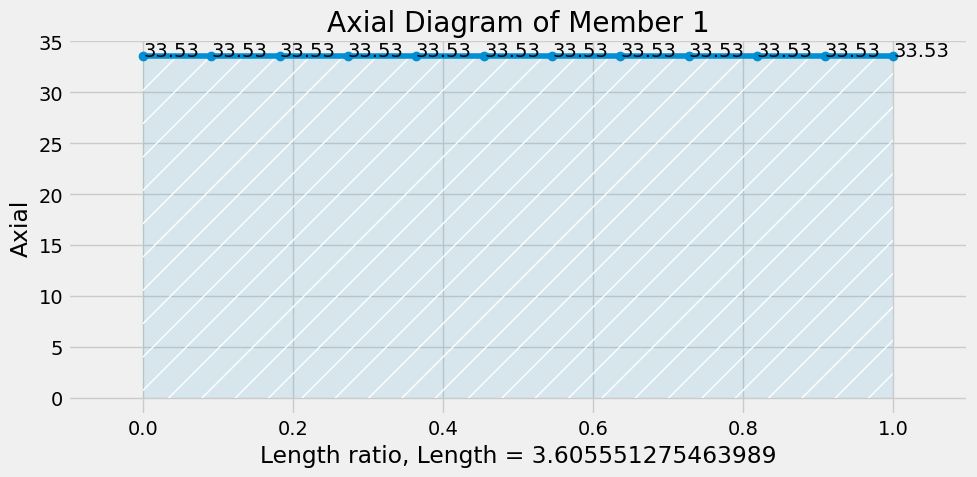

In [15]:
M1.Plot_Axial_Diagram()

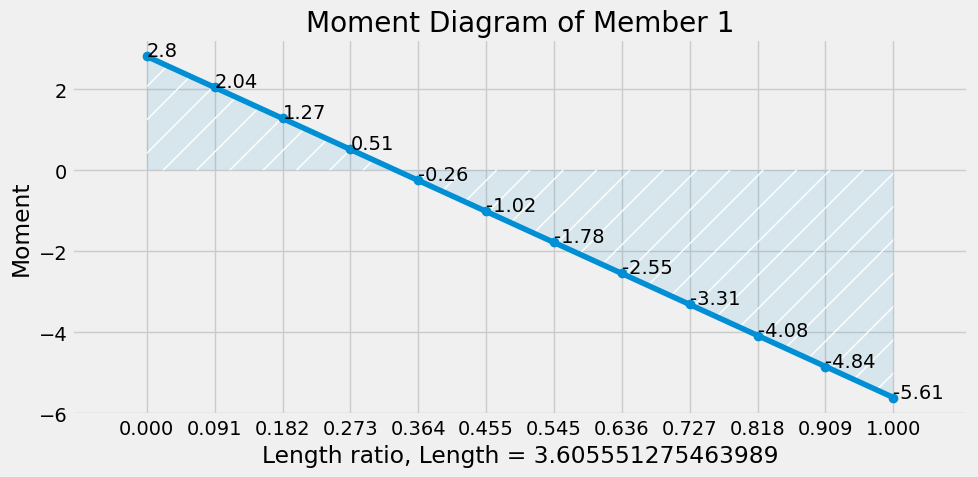

In [16]:
M1.Plot_Moment_Diagram()

In [17]:
M1.Summary()

At Left End:
Axial: 33.52857307951716
Shear: -2.3337639804135684
Moment: 2.8047509553590273

At Right End:
Axial: 33.52857307951716
Shear: -2.3337639804135684
Moment: -5.609754740853029

Minimum and Maximum
Minimum Shear: -2.3337639804135684
Maximum Shear: -2.3337639804135684
Minimum Moment: 2.8047509553590273
Maximum Moment: -5.609754740853029


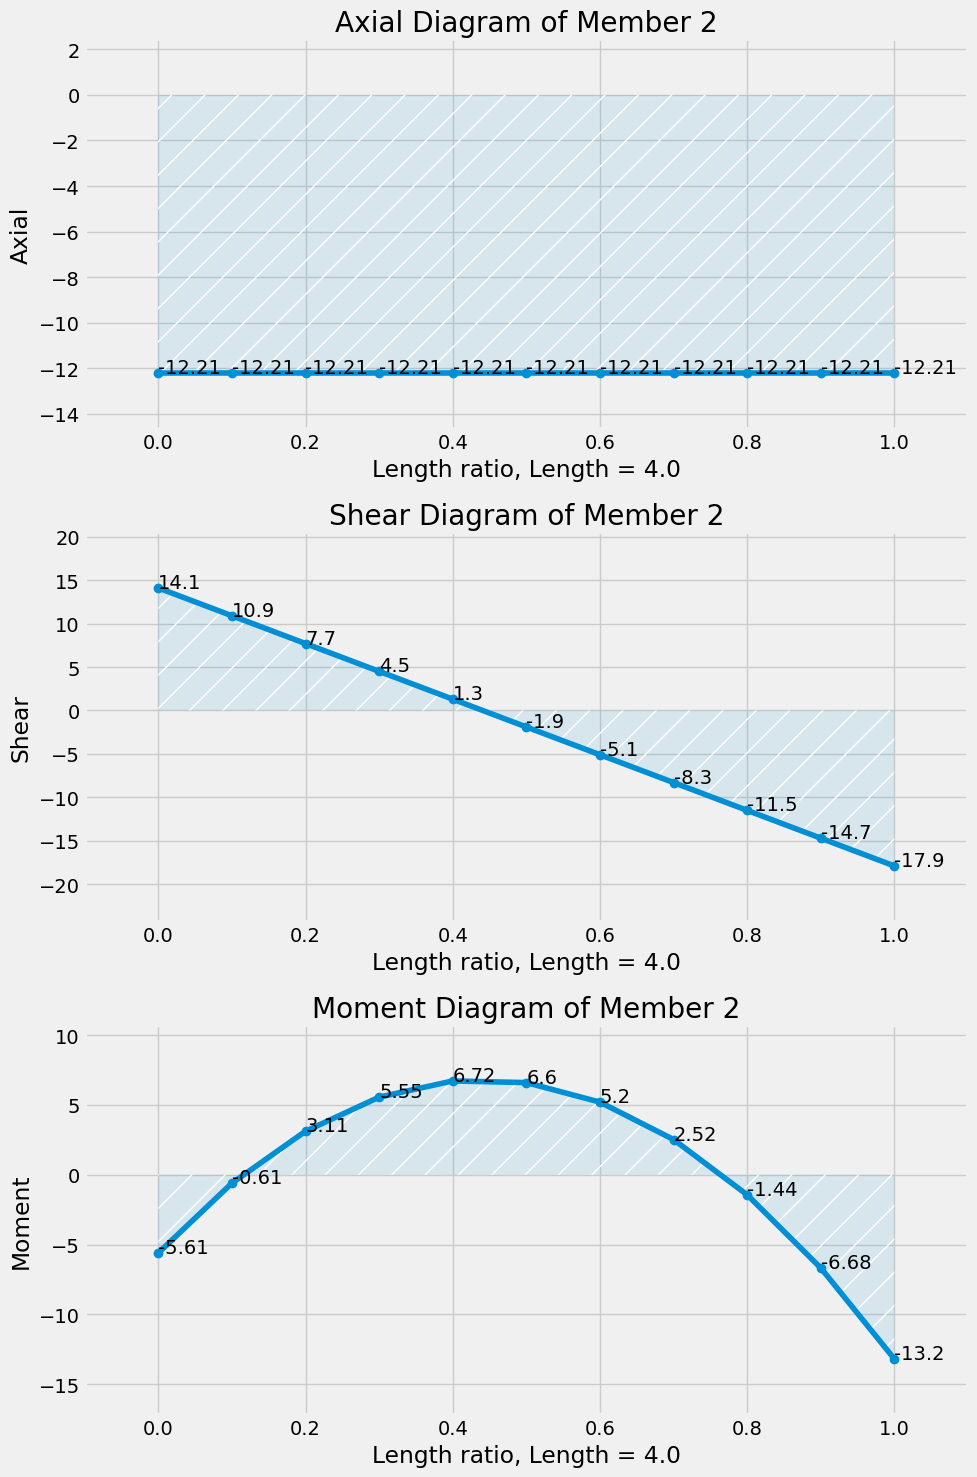

In [18]:
M2.Plot_Diagrams()

In [19]:
M2.Summary()

At Left End:
Axial: -12.206326461611571
Shear: 14.103174346852114
Moment: -5.608817238312243

At Right End:
Axial: -12.206326461611571
Shear: -17.896825653147886
Moment: -13.196119850903784

Minimum and Maximum
Minimum Shear: -17.896825653147886
Maximum Shear: 14.103174346852114
Minimum Moment: 6.71626171665114
Maximum Moment: -13.196119850903784
